# Digital Image Processing Practical Assignment 2

- **Submitted By:**
    - **Name:** Abhisht Chouhan
    - **Roll Number:** 21BCP450D
    - **Course:** B.Tech Computer Science and Engineering
    - **Course Code:** 20CP317P
    - **Course Title:** Digital Image Processing Lab
    - **Submission Date:** 19th February 2024
    - **Submitted To:** Dr. Shilpha Pandey

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
resource_path = "../../data/Lab_Assignment2"

## Image Enhancement using Histogram Equalization

In [60]:
def calcHist(image):
    im = image.convert('L')
    im = np.asarray(im)
    
    hist_values = {}
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] in hist_values:
                hist_values[im[i][j]] += 1
            else:
                hist_values[im[i][j]] = 1
                
    hist_values = dict(sorted(hist_values.items())) 
    return hist_values

def equHist(image, hist_values):
    im = image.convert('L')
    im = np.asarray(im)
    
    total_pixels = im.shape[0] * im.shape[1]
    pdf = {}
    cdf = {}
    equ_hist = {}
    
    for key in hist_values:
        pdf[key] = np.round(hist_values[key] / total_pixels, 4)
    
    for i, key in enumerate(pdf):
        if i == 0:
            cdf[key] = pdf[key]
        else:
            cdf[key] = cdf[list(cdf.keys())[i-1]] + pdf[key]
    
    for key in cdf:
        equ_hist[key] = round(cdf[key] * 255)
    
    equ_im = np.zeros(im.shape)
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            equ_im[i][j] = equ_hist[im[i][j]]
            
    return equ_im, equ_hist, cdf

def compareHist(hist1, hist2, cdf):
    plt.subplots(1, 3, figsize=(15, 5))
    plt.subplot(131)
    plt.bar(hist1.keys(), hist1.values())
    plt.title('Original Histogram')
    plt.subplot(132)
    plt.plot(list(cdf.keys()), list(cdf.values()), color='r')
    plt.title('CDF')
    plt.subplot(133)
    plt.bar(hist2.keys(), hist2.values())
    plt.title('Equalized Histogram')
    plt.show()
    
def compareImages(im1, im2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(im1, cmap='gray')
    plt.title('Original Image')
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(im2, cmap='gray')
    plt.title('Equalized Image (Enhanced)')
    plt.axis("off")
    plt.show()

In [61]:
img_array = ["img2.jpg","img3.jpg","img4.tif","img5.tif","img6.tif"]
img_array_op = []
for each_img in img_array:
    im = Image.open(os.path.join(resource_path, "equil" ,each_img))
    hist_values = calcHist(im)
    equ_im, equ_hist, cdf = equHist(im, hist_values)
    img_array_op.append([im, hist_values, equ_im, equ_hist, cdf])


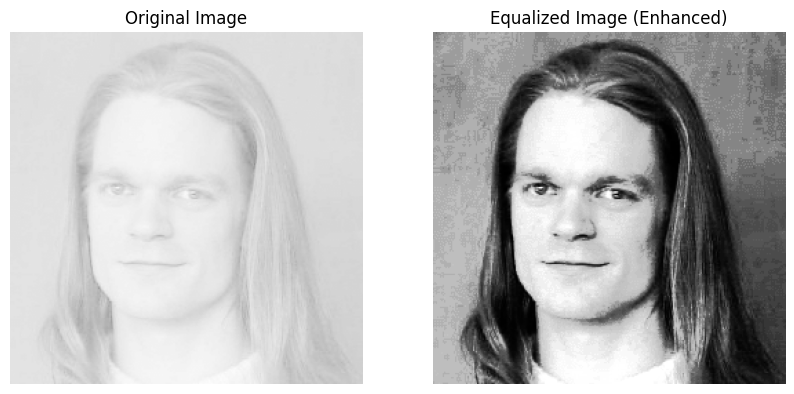

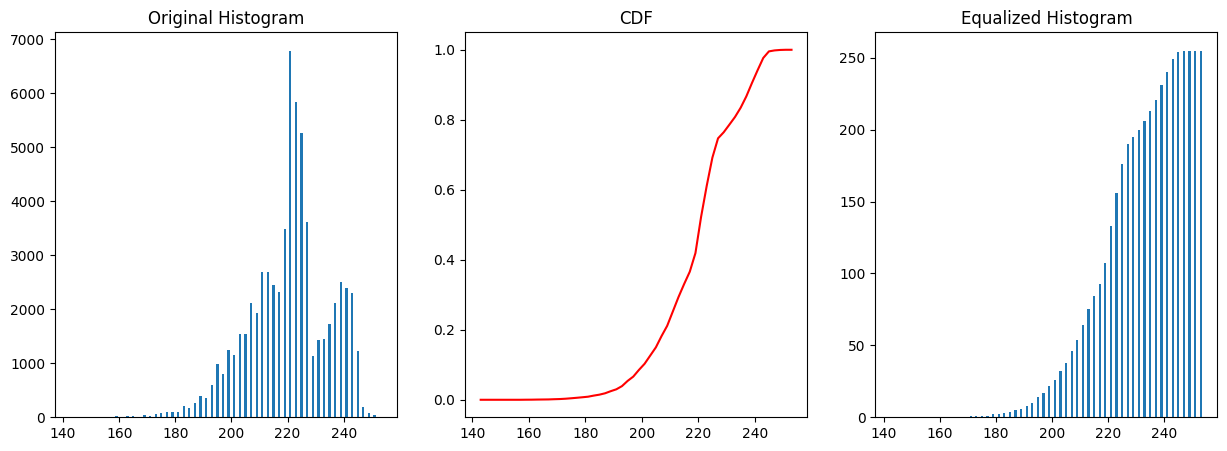


   ----------------------------------------------------------------------------------------------------   



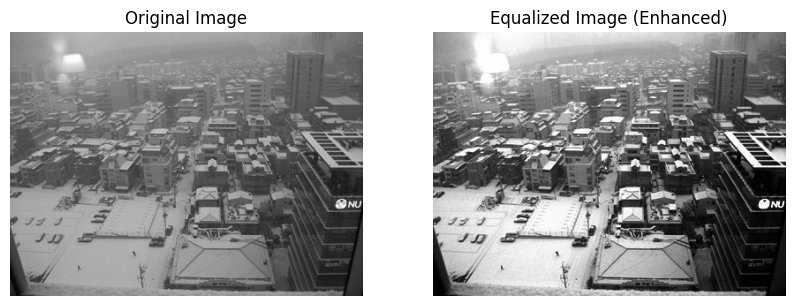

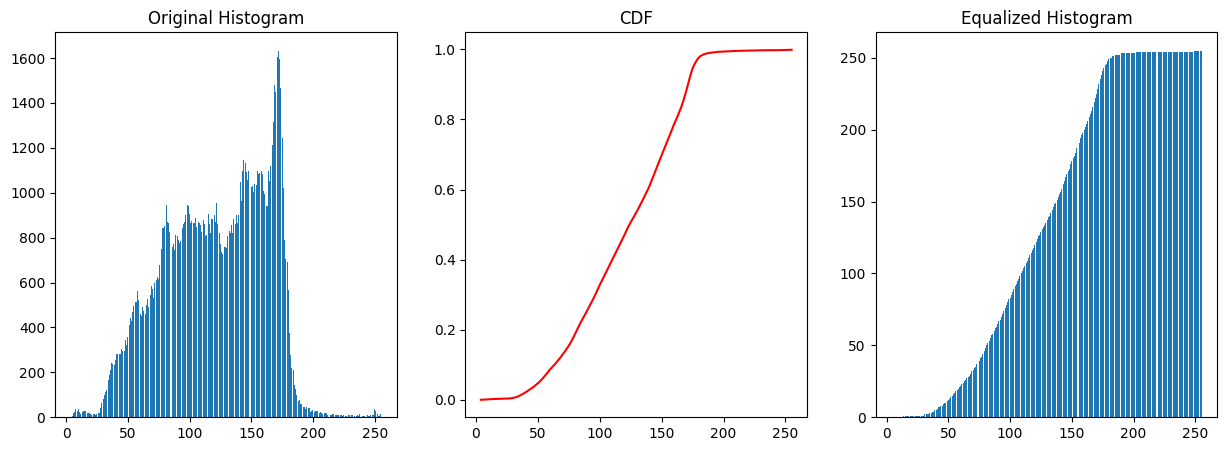


   ----------------------------------------------------------------------------------------------------   



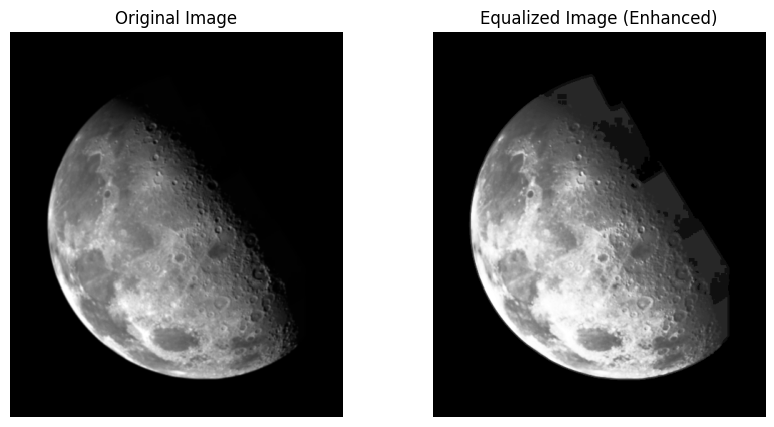

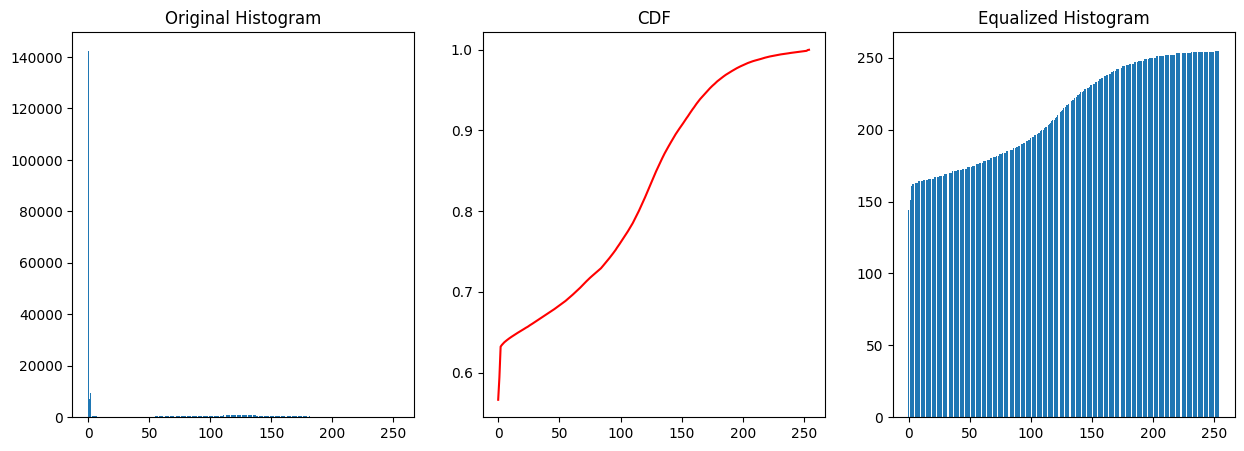


   ----------------------------------------------------------------------------------------------------   



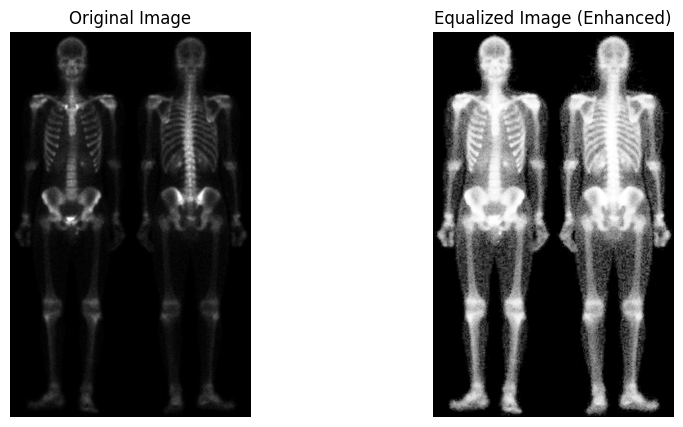

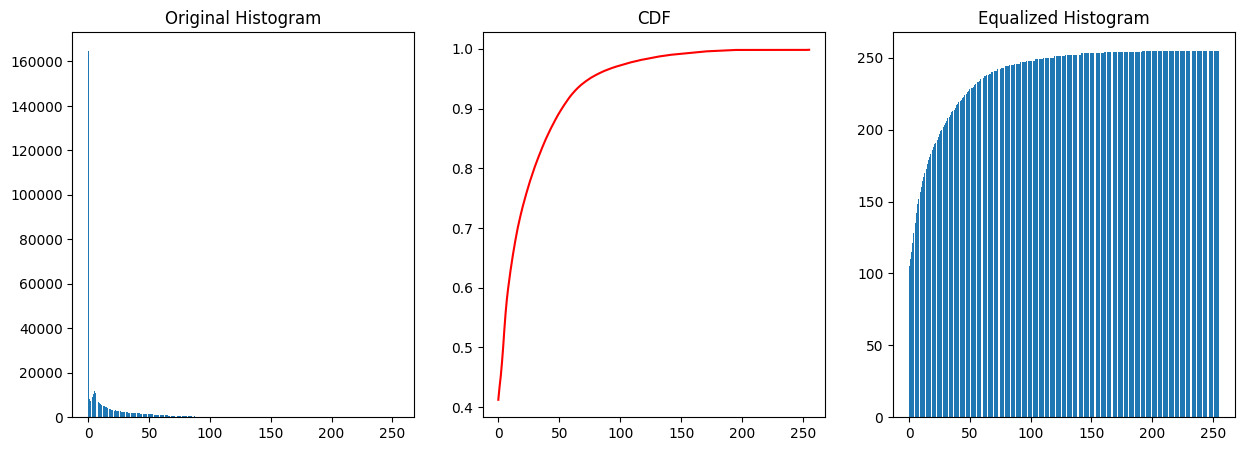


   ----------------------------------------------------------------------------------------------------   



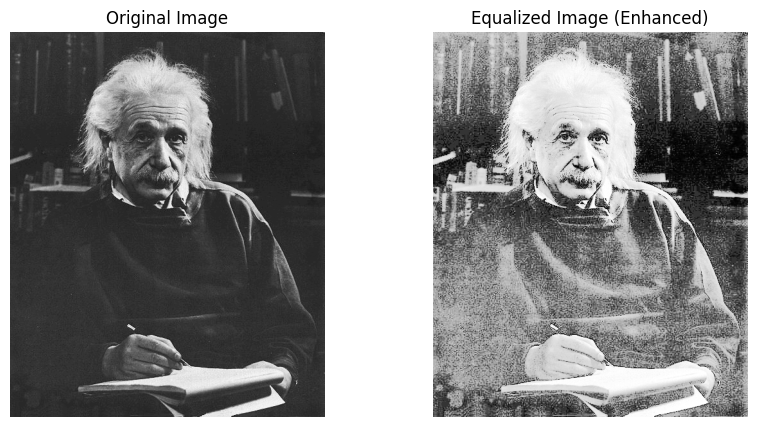

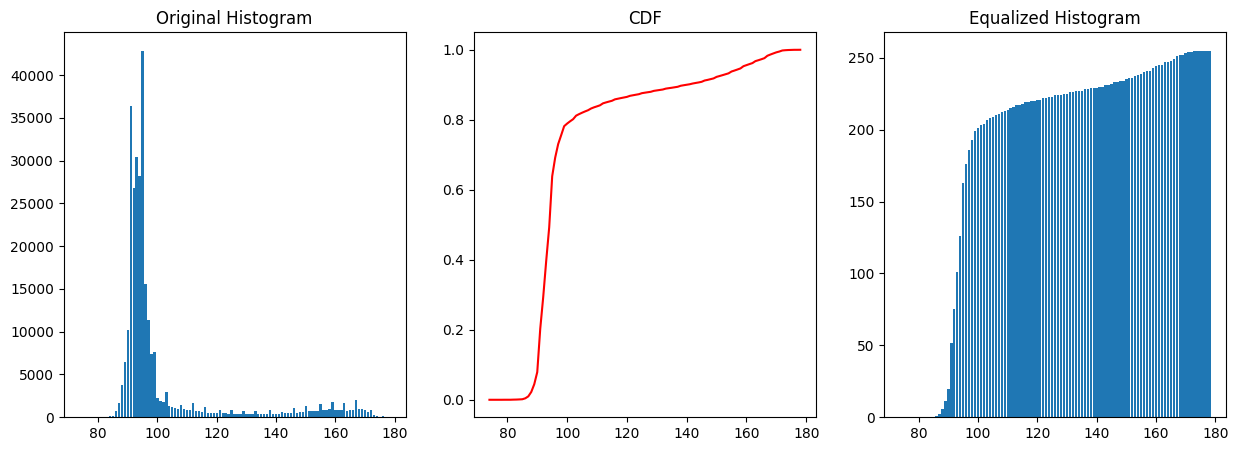


   ----------------------------------------------------------------------------------------------------   



In [44]:
## To Compare Images
for i in range(len(img_array_op)):
    compareImages(img_array_op[i][0], img_array_op[i][2])
    compareHist(img_array_op[i][1], img_array_op[i][3], img_array_op[i][4])

    ## Draw Seperator
    print("\n   " + "-"*100 + "   \n")

## Histogram Matching/Specification

In [57]:
def plot_two_images(img1, img2, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    if img1.mode != 'RGB':
        plt.imshow(img1, cmap="gray")
    else:
        plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    if img2.mode != 'RGB':
        plt.imshow(img2, cmap="gray")
    else:
        plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")
    plt.show()

def _find_nearest_above(reference_roundoff, target):
    diff = reference_roundoff - target
    mask = np.ma.less_equal(diff, -1)

    if np.all(mask):
        c = np.abs(diff).argmin()
        return c

    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()


def _match_cumulative_cdf(source, template):
    src_values, src_lookup, src_counts = np.unique(source.reshape(-1), return_inverse=True, return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.reshape(-1), return_counts=True)

    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size

    src_rounded = np.around(src_quantiles * 255)
    tmpl_rounded = np.around(tmpl_quantiles * 255)

    mapped_values = []

    for data in src_rounded:
        mapped_values.append(_find_nearest_above(tmpl_rounded, data))

    mapped_values = np.array(mapped_values, dtype="uint8")
    return mapped_values[src_lookup].reshape(source.shape)


def match_histogram(image, reference, channel_axis=None):
    image = np.asarray(image)
    reference = np.asarray(reference)

    if image.ndim != reference.ndim:
        raise ValueError(f"Both the images should have the same number of channels. Image has {image.ndim} channels and reference has {reference.ndim} channels")

    if channel_axis is not None:
        if image.shape[channel_axis] != reference.shape[channel_axis]:
            raise ValueError(f"The number of channels in the image and reference should be the same. Image has {image.shape[channel_axis]} channels and reference has {reference.shape[channel_axis]} channels")

        matched = np.zeros_like(image)

        for channel in range(image.shape[-1]):
            matched_channel = _match_cumulative_cdf(image[..., channel], reference[..., channel])
            matched[..., channel] = matched_channel

        return matched


def plot_images(img1, img2, img3, title1, title2, title3):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(img1)
    ax1.set_title(title1)
    ax2.imshow(img2)
    ax2.set_title(title2)
    ax3.imshow(img3)
    ax3.set_title(title3)

    plt.tight_layout()
    plt.show()


def match_and_display(im, ref, channel_axis=-1):
    new_img = match_histogram(im.convert("RGB"), ref, channel_axis=channel_axis)
    plot_images(im, ref, new_img, 'Source', 'Reference', 'Matched')

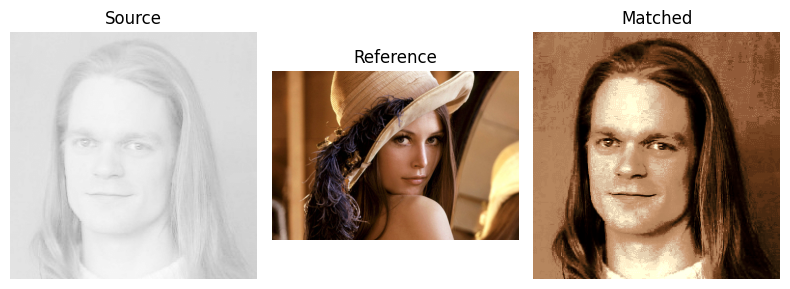

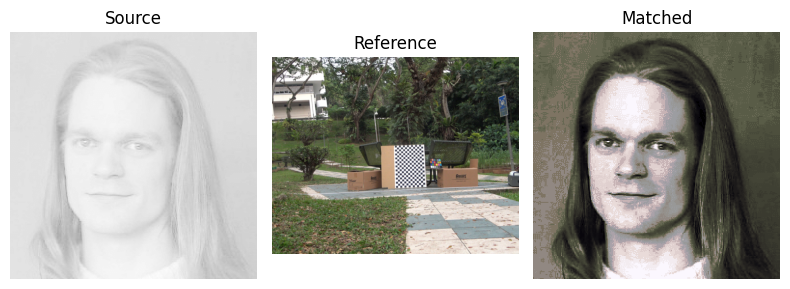

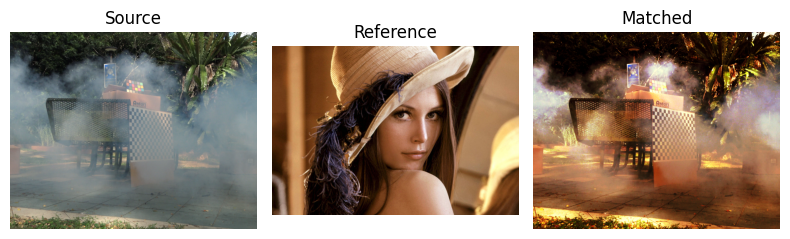

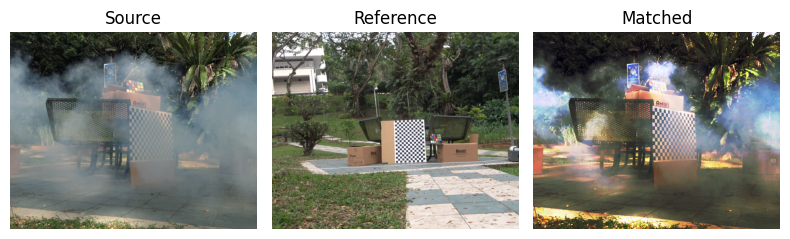

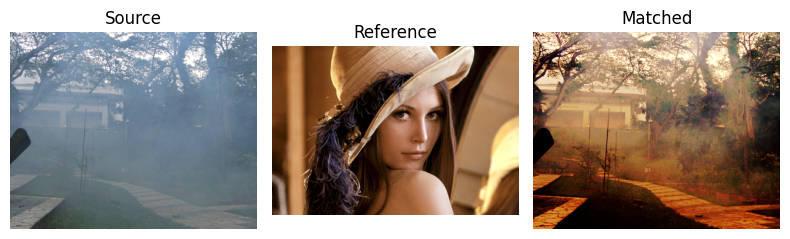

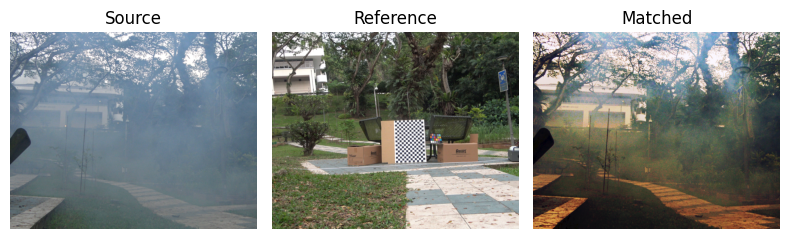

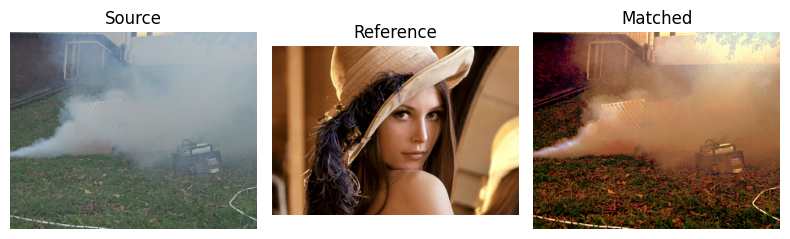

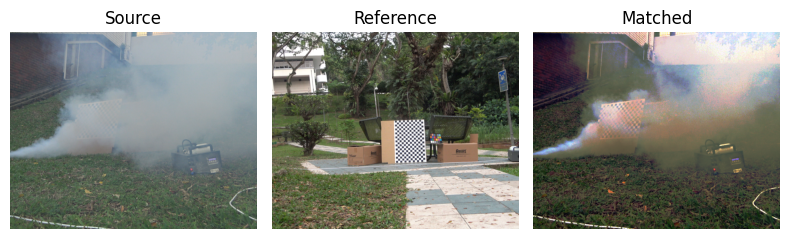

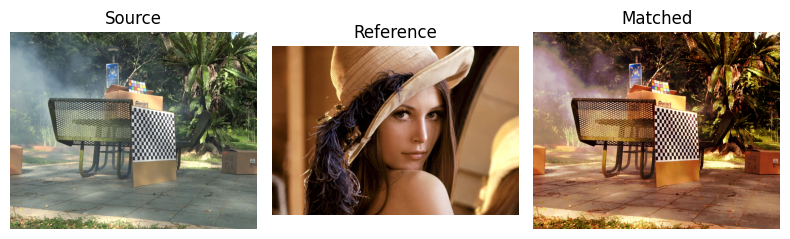

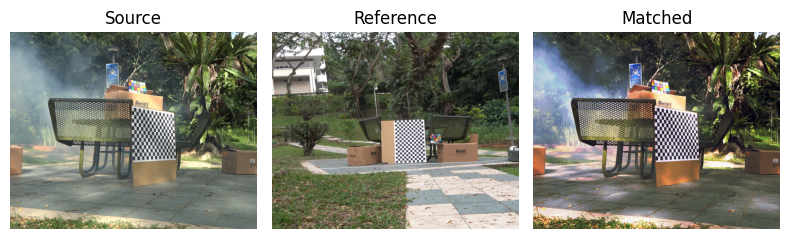

In [62]:
reference_image_1 = Image.open(os.path.join(resource_path, "specfi" ,'lena_ref1.jpg'))
reference_image_2 = Image.open(os.path.join(resource_path, "specfi" ,'refer_img2.png'))
img_array = ["input_img1.png","input_img2.png","input_img3.png","input_img4.png","input_img5.png"]

for img_each in img_array:
    input_image = Image.open(os.path.join(resource_path,"specfi", img_each))

    # Match with the first reference image
    match_and_display(input_image, reference_image_1, channel_axis=-1)

    # Match with the second reference image
    match_and_display(input_image, reference_image_2, channel_axis=-1)